**지도학습(분류)**
- 결정 트리 모델(Decision tree) : 쉽고 많이 쓰인다
> 왜 이렇게 분류했는지 정확(모델 설명 가능)

=> 머신러닝, 딥러닝의 문제점 : 모델의 성능을 설명할 줄 모름 -> XAI(설명가능한 인공지능)


와인 데이터
- 레드와인, 화이트와인 분류
- 데이터 : 당도, 알콜, pH, 클래스(정답) => 이러한 feature를 포함한 표를 작성해야함

### 1. 데이터 로드

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head() 

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


### 2. 탐색적 데이터 분석

In [5]:
# 6497개의 와인 샘플 데이터
# 4가지(alcohol, sugar, pH, class) : 실수값(float)
# 결측치 없음(모두 non-null)

wine.info() # 데이터가 어떻게 구성되어있는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [7]:
# 특징의 min, max값이 제각각 다르기 때문에 정규화 필요
wine.describe() 

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


### 3. 데이터 전처리

In [13]:
# 특징/라벨 데이터 이미 생성되어있음
# 합쳐져 있는 데이터들을 각각으로 쪼개서 저장하기

data = wine[['alcohol', 'sugar', 'pH']].to_numpy() # 특징 데이터
target = wine['class'].to_numpy()  # 정답데이터(따로 분리)

print(type(data))
print(type(target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
# Train / Test 데이터 분리해야함(8:2비율)

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state=42)

In [18]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [22]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 4. 결정 트리 모델
- 분류 결과를 설명가능한 모델(많이 쓰임)

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))  # overfitting(과대적합) => train이 test보다 성능이 더 좋다

0.996921300750433
0.8592307692307692


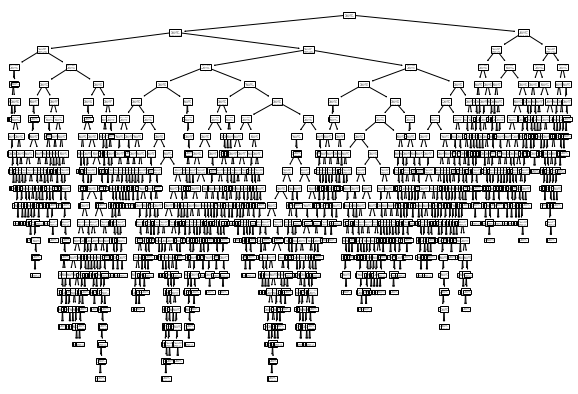

In [39]:
# 트리 모델 시각화
# - 트리모델은 나무를 거꾸로 한 형태(root가 가장 위에)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()   # 사이즈가 커서 그래프 생성에 시간이 오래 걸림

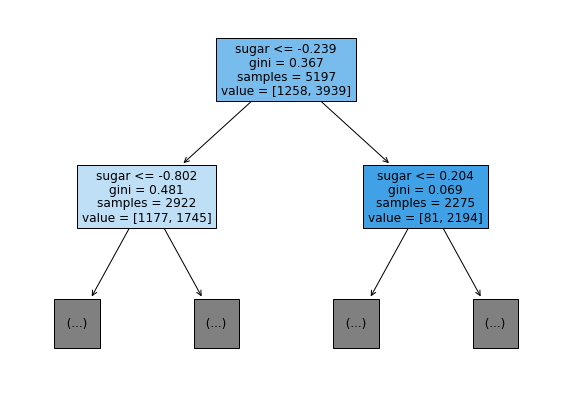

In [44]:
# 5197 samples
# True면 왼쪽, false면 오른쪽 

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar','pH'])
plt.show()

### 불순도(gini 계수)

$지니불순도 = 1-(음성클래스비율^2 + 양성클래스비율^2)$

- 지니계수의 값은 0~0.5
- 0.5면 최악(클래스가 모두 동일한 경우)
- 0이면 순수 노드(하나의 클래스로 분류됨)
- 가지를 쳤을 때 불순도 값이 줄어드는 방향으로 학습

**시험**
- 결정 트리모델에서 gini계수가 뜻하는 게 무엇인가?